# Lab Exercise 4: Edge Detection and Line Detection 
•	Objective: Detect edges and lines in an image using various algorithms. 

•	Task: Implement Canny edge detection, Sobel, and Hough transform to detect edges and lines in a sample image. 


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


Image shape: (320, 597)


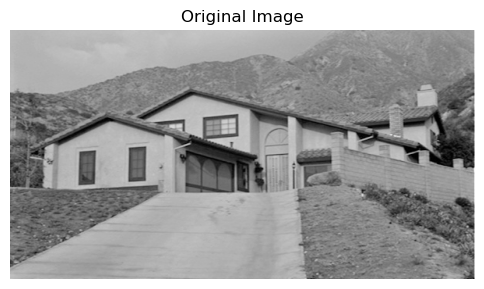

In [13]:
# Load the image in grayscale
image = cv2.imread("./image1.jpg", cv2.IMREAD_GRAYSCALE)
print("Image shape:", image.shape)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()


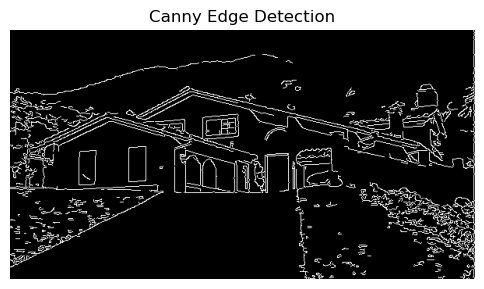

In [14]:
# Apply Canny edge detection
edges_canny = cv2.Canny(image, threshold1=100, threshold2=200)

# Display the Canny edge-detected image
plt.figure(figsize=(6, 6))
plt.imshow(edges_canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()


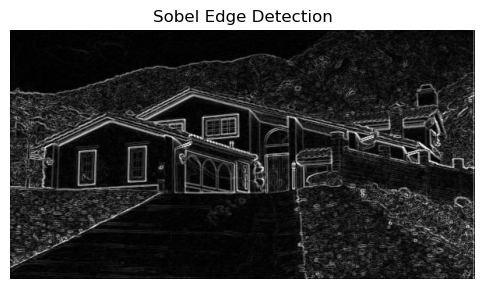

In [15]:
# Apply Sobel edge detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in X direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in Y direction

# Convert gradients to absolute values and then to uint8
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

# Combine X and Y gradients
edges_sobel = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

# Display the Sobel edge-detected image
plt.figure(figsize=(6, 6))
plt.imshow(edges_sobel, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')
plt.show()


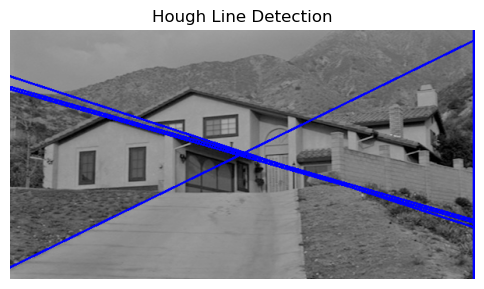

In [16]:
# Apply Hough Line Transform
lines = cv2.HoughLines(edges_canny, rho=1, theta=np.pi/180, threshold=150)

# Create a copy of the original image to draw lines
image_with_lines = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw each line on the image
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the image with detected lines
plt.figure(figsize=(6, 6))
plt.imshow(image_with_lines)
plt.title("Hough Line Detection")
plt.axis('off')
plt.show()


# Lab Exercise 4: Edge Detection and Line Detection

## Objective
This lab demonstrates edge detection and line detection in images using various techniques: Canny edge detection, Sobel edge detection, and Hough Line Transform. Each technique is explored to understand its effectiveness in identifying edges and lines in an image.

## Techniques Used

1. **Canny Edge Detection**: 
   - A multi-stage edge detection algorithm that uses gradient calculations and non-maximum suppression.
   - Detects strong edges with adjustable thresholds.
   - Useful for sharp edge detection.

2. **Sobel Edge Detection**:
   - Computes the gradient of the image intensity in both X and Y directions.
   - Produces edge maps showing intensity transitions, highlighting horizontal and vertical edges.
   - Combined X and Y gradients provide a comprehensive edge map.

3. **Hough Line Transform**:
   - Applied on the Canny edge-detected image to identify straight lines.
   - Uses polar coordinates (rho and theta) to represent lines.
   - Suitable for detecting linear structures, such as borders or outlines in structured images.

## Results Summary
- Each edge detection technique captures unique aspects of the image's structure:
  - **Canny** detects clear, sharp edges and is effective in identifying prominent boundaries.
  - **Sobel** highlights gradient transitions in horizontal and vertical directions, useful for texture and detailed structures.
  - **Hough Transform** accurately identifies and marks straight lines, enhancing visualization of linear features.
- Edge and line detection techniques are essential for pre-processing in computer vision tasks, enabling further analysis and feature extraction.

## Conclusion
The combination of Canny, Sobel, and Hough Transform methods provides a robust framework for edge and line detection. By experimenting with different threshold values, we can achieve effective feature extraction tailored to specific image characteristics.

---

### Note
Adjust threshold values for optimal results based on image resolution and contrast. Edge detection techniques form the foundation for more advanced image processing and computer vision applications.
